In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [126]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [127]:
df = pd.DataFrame(x_train)
df["label"] = y_train

df1 = pd.DataFrame(x_test)
df1["label"] = y_test

df = pd.concat([df , df1] , axis = 0)
df.head()


0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]

In [100]:
df.shape

(70000, 785)

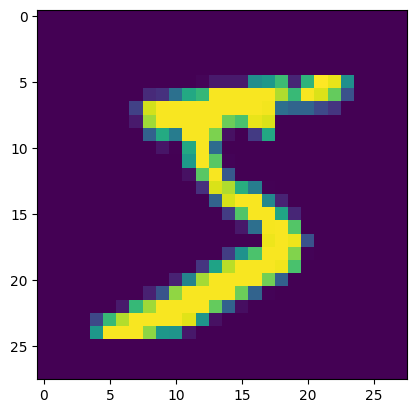

In [101]:
plt.imshow(x_train[0].reshape(28,28))

In [102]:
df.shape

(70000, 785)

In [103]:
df.head()

0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]

In [128]:
X = df.drop("label" , axis = 1)
y = df["label"]

In [105]:
X.head()

0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   778  779  780  781  782  783  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 784 columns]

In [129]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [107]:
X_train.shape

(56000, 784)

In [130]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [109]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , knn.predict(X_test))

0.9700714285714286

# **Using PCA**

In [137]:
### Step 1 : Mean Centric using sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
## Step 2 :
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
X_train_trf.shape

(56000, 200)

In [139]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf , y_train)

KNeighborsClassifier()

In [140]:
y_pred = knn.predict(X_test_trf)

In [141]:
accuracy_score(y_test,y_pred)

0.9550714285714286

In [ ]:
res = {}
for i in range(1,784):
  pca = PCA(n_components=i)
  X_train_trf = pca.fit_transform(X_train)
  X_test_trf = pca.transform(X_test)
  knn = KNeighborsClassifier()
  knn.fit(X_train_trf , y_train)
  y_pred = knn.predict(X_test_trf)

  res[i] = accuracy_score(y_test,y_pred)
  if i%100 == 0:
    print(i)

key = max(res)

print(key , res[key])

# **Visualization**

In [148]:
## pca with 2 features
pca = PCA(n_components= 2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [150]:
X_train_trf

array([[ -0.66184663,  -3.52844877],
       [ -2.4256249 ,  -3.51506096],
       [ -3.5671334 ,   4.78236184],
       ...,
       [ -8.34347904,  -1.19630488],
       [ 10.4937875 ,  -9.03606709],
       [ 10.57302752, -12.31764924]])

In [152]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x = X_train_trf[:,0],
                 y = X_train_trf[:,1],
                 color = y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [153]:
## pca with 3 component
pca = PCA(n_components= 3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [154]:
X_train_trf

array([[ -0.66184663,  -3.52844877,   3.59270247],
       [ -2.4256249 ,  -3.51506096,  -6.09394423],
       [ -3.5671334 ,   4.78236184,  -0.1521625 ],
       ...,
       [ -8.34347904,  -1.19630488,   2.03380685],
       [ 10.4937875 ,  -9.03606709,  -2.0532022 ],
       [ 10.57302752, -12.31764924,   3.06175533]])

In [155]:
fig = px.scatter_3d(x = X_train_trf[:,0],
                    y = X_train_trf[:,1],
                    z = X_train_trf[:,2],
                    color = y_train_trf,
                    color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

# **Attributes of PCA**

In [156]:
## Eigen Values => These are explain variances
pca.explained_variance_

array([40.6329685 , 29.01311301, 26.91849535])

In [159]:
##  Eigen Vectors
pca.components_.shape

(3, 784)

In [157]:
pca.explained_variance_ratio_

array([0.05674894, 0.04052038, 0.03759499])

# **Finding Optimum Number of Components for PCA**

In [160]:
pca.explained_variance_ratio_*100

array([5.67489426, 4.0520384 , 3.75949926])

In [161]:
pca = PCA(n_components = None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [163]:
pca.explained_variance_.shape

(784,)

In [164]:
pca.components_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [166]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05674894, 0.09726933, 0.13486432, 0.16394266, 0.18922822,
       0.2112008 , 0.23034992, 0.24791485, 0.26323209, 0.27717496,
       0.29064362, 0.30274463, 0.31395047, 0.32494179, 0.33525705,
       0.34523224, 0.35461032, 0.36383165, 0.37276159, 0.38140025,
       0.38962348, 0.39763208, 0.40530461, 0.41275343, 0.4199253 ,
       0.42684165, 0.43363123, 0.44023178, 0.44655255, 0.45267144,
       0.45868955, 0.46459041, 0.47026563, 0.4758571 , 0.48140571,
       0.4867798 , 0.4920408 , 0.49724346, 0.50237036, 0.50721194,
       0.51199592, 0.51667851, 0.5212608 , 0.52580576, 0.53028051,
       0.5346804 , 0.53906093, 0.54337629, 0.54763368, 0.55181705,
       0.55593261, 0.5599607 , 0.56395699, 0.56790803, 0.57180668,
       0.57555611, 0.57927153, 0.58297237, 0.58659865, 0.59018836,
       0.59372061, 0.59720922, 0.60065098, 0.60407883, 0.6074625 ,
       0.61078319, 0.61407195, 0.61730706, 0.62049057, 0.62365472,
       0.62677964, 0.62988218, 0.6329545 , 0.63598082, 0.63897

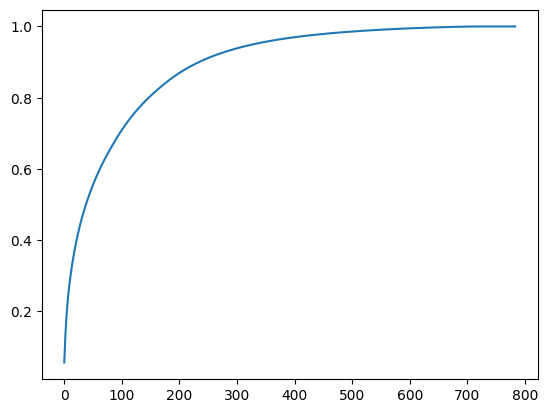

In [167]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
### So In Above Graph we can see the optimal number of features for this dataset is round about 200.